# Numpy Tutorial
- Numpy 에 대해 복습해봅시다.
- Pytorch의 Tensor도 대부분 비슷하게 동작하고, 대부분의 데이터를 numpy 라이브러리로 전처리하는 경우가 많기 때문에 익숙해지는 것이 좋습니다.

In [1]:
import numpy as np

Numpy 를 사용하면 왜 좋은지에 대해 먼저 알아봅시다.

In [3]:
[x**2 for x in range(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [2]:
squares = np.array([x**2 for x in range(10)])
squares

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [4]:
squares = np.arange(10)**2
squares

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)

In [5]:
%timeit np.array([x**2 for x in range(10)]) # 제곱을 한 값을 list에 넣고, array로 만들어줍니다. (가장 느림)

4.36 µs ± 207 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [6]:
%timeit np.array([x for x in range(10)])**2 # 0~9를 list에 넣고, array로 만든 뒤 제곱합니다.

3.58 µs ± 151 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [7]:
%timeit np.arange(10)**2 # arange 함수를 통해 0~9로 이루어진 array를 만들고, 제곱합니다. (가장 빠름)

1.58 µs ± 46.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


이처럼 numpy 연산을 활용하면 속도를 향상시킬 수 있습니다. 복잡한 연산일수록 그 효과가 증대됩니다. (vector 연산, matrix 연산, ...)

- 이제, numpy array를 생성하는 방법들을 확인해봅시다.

In [8]:
# numpy array는 list, tuple, set 모두로부터 생성가능합니다.
squares = [x**2 for x in range(10)]         # python list
cubes = tuple(x**3 for x in range(10))      # python tuple
evens = {x for x in range(10) if x%2 == 0}  # python set

print(type(squares))
print(type(cubes))
print(type(evens))



<class 'list'>
<class 'tuple'>
<class 'set'>


In [9]:
a = np.array(squares)
b = np.array(cubes)
c = np.array(evens)

if type(a) == type(b) == type(c):
    print(type(a))

<class 'numpy.ndarray'>


In [11]:
# numpy array를 생성할 때, data type을 지정할 수 있습니다.
zeros = np.zeros((3, 3), dtype=np.int32) # create a 3x3 array of 0's
ones = np.ones((2, 2), dtype=np.float64) # create a 2x2 array of 1's
empty = np.empty((3, 3))

print(zeros, zeros.dtype.name)
print(ones, ones.dtype.name)
print(empty, empty.dtype.name)

[[0 0 0]
 [0 0 0]
 [0 0 0]] int32
[[1. 1.]
 [1. 1.]] float64
[[0.00e+000 0.00e+000 0.00e+000]
 [0.00e+000 0.00e+000 6.66e-321]
 [0.00e+000 0.00e+000 0.00e+000]] float64


In [12]:
# data type의 변경도 가능합니다.
print(empty, empty.dtype.name)
empty = empty.astype(np.float16)
print(empty, empty.dtype.name)
empty = empty.astype(int)
print(empty, empty.dtype.name)

[[0.00e+000 0.00e+000 0.00e+000]
 [0.00e+000 0.00e+000 6.66e-321]
 [0.00e+000 0.00e+000 0.00e+000]] float64
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] float16
[[0 0 0]
 [0 0 0]
 [0 0 0]] int32


In [13]:
# arange VS linspace
a = np.arange(5, 30, 5) # 5~30까지의 값을 5 간격으로 쪼개어 만듭니다. (max값은 제외합니다.)
print(a.shape)
a

(5,)


array([ 5, 10, 15, 20, 25])

In [14]:
b = np.linspace(0, 1, 100) # 0~1 사이의 값을 100개로 쪼개어 만듭니다. (양 끝을 포함합니다.)
print(b.shape)
b

(100,)


array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

- 이제, numpy array를 이용해 연산해봅시다.

In [15]:
a = np.ones(15).reshape(3, 5)
b = np.ones(15).reshape(5, 3)

mult = a * 10            # element-wise multiplication
dot_prod1 = a.dot(b)     # dot product version 1 (matrix multiplication)
dot_prod2 = np.dot(a, b) # dot product version 2 (matrix multiplication)

print(mult, end='\n\n')
print(dot_prod1, end='\n\n')
print(dot_prod2)

[[10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10.]]

[[5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]]

[[5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]]


In [16]:
a, b = dot_prod1, dot_prod2

print(a)
a += b # in-place 연산
print(a)
c = a + b
print(a) 

[[5. 5. 5.]
 [5. 5. 5.]
 [5. 5. 5.]]
[[10. 10. 10.]
 [10. 10. 10.]
 [10. 10. 10.]]
[[10. 10. 10.]
 [10. 10. 10.]
 [10. 10. 10.]]


In [17]:
# 서로 다른 타입의 연산은 더 큰 범위의 타입으로 변환됩니다.
a = np.ones(10, dtype=int)
b = np.ones(10, dtype=float)
c = np.ones(10, dtype=complex)

a_plus_b = a + b # int + float
b_plus_c = b + c # float + complex

print(a_plus_b.dtype.name)
print(b_plus_c.dtype.name)

float64
complex128


In [18]:
# useful array methods
a = np.arange(1, 11)
print('Sum:', a.sum())
print('Min:', a.min())
print('Max:', a.max())

Sum: 55
Min: 1
Max: 10


In [19]:
# applying methods to a single axis
a = np.arange(15).reshape(3, 5) + 1

print(a)
print(a.sum(axis=0)) # sum each column
print(a.min(axis=1)) # min of each row


[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]
[18 21 24 27 30]
[ 1  6 11]


In [20]:
# universal functions (sin, cos, exp, sqrt, ... etc)
a = np.linspace(0, 2*np.pi, 10000)

sin_a = np.sin(a)
sqrt_a = np.sqrt(a)
exp_a = np.exp(a)

print(sin_a, end='\n\n')
print(sqrt_a, end='\n\n')
print(exp_a, end='\n\n')

[ 0.00000000e+00  6.28381328e-04  1.25676241e-03 ... -1.25676241e-03
 -6.28381328e-04 -2.44929360e-16]

[0.         0.02506754 0.03545085 ... 2.50637757 2.50650293 2.50662827]

[  1.           1.00062858   1.00125755 ... 534.81909228 535.15526825
 535.49165552]



- Indexing, slicing

In [21]:
# indexing
A = np.array([x**2 for x in range(1, 11)]).reshape(2, 5)

print(A, end='\n\n')
print('A[0]\t\t', A[0])
print('A[-1]\t\t', A[-1])
print('A[0][0]\t\t', A[0][0])
print('A[-1][-1]\t', A[-1][-1])
print('A[-1,-1]\t', A[-1,-1])
#print('', A[])

[[  1   4   9  16  25]
 [ 36  49  64  81 100]]

A[0]		 [ 1  4  9 16 25]
A[-1]		 [ 36  49  64  81 100]
A[0][0]		 1
A[-1][-1]	 100
A[-1,-1]	 100


In [22]:
# slicing
cubes = np.arange(1, 13).reshape(4, 3)**3 # cubes of 1-12

print(cubes[:,:], end='\n\n')         # all rows, all cols
print('First Column:\t', cubes[:, 0]) # first col
print('Last Column:\t', cubes[:, -1]) # last col
print('First Row:\t', cubes[0, :])    # first row
print('Last Row:\t', cubes[-1, :])    # last row

[[   1    8   27]
 [  64  125  216]
 [ 343  512  729]
 [1000 1331 1728]]

First Column:	 [   1   64  343 1000]
Last Column:	 [  27  216  729 1728]
First Row:	 [ 1  8 27]
Last Row:	 [1000 1331 1728]


In [23]:
# 복잡한 형태의 indexing과 slicing
a = np.arange(24).reshape(8,3)

print(a)
print('\n',a[range(2,5),:])
print('\n',a[[2,3,4], 1:3])
print('\n',a[[2,3,4],[0,1,2]]) # [2,0], [3,1], [4,2] 위치의 element들을 추출합니다

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]
 [21 22 23]]

 [[ 6  7  8]
 [ 9 10 11]
 [12 13 14]]

 [[ 7  8]
 [10 11]
 [13 14]]

 [ 6 10 14]


In [24]:
# indexing using boolean
mask = np.eye(3, dtype=bool)
mask

array([[ True, False, False],
       [False,  True, False],
       [False, False,  True]])

In [25]:
a = np.arange(9).reshape(3,3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [28]:
a[mask] # True 인 지점만 추출합니다.

array([0, 4, 8])

In [29]:
a[~mask]

array([1, 2, 3, 5, 6, 7])

- 값을 대체하고 싶은 경우 사용할 수 있는 메서드

In [30]:
array = np.arange(40).reshape(10,4)
print(array)
array[:,3] = -1
print(array)
array[[5,3,7],[0,2,1]] = -20
print(array)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]
 [32 33 34 35]
 [36 37 38 39]]
[[ 0  1  2 -1]
 [ 4  5  6 -1]
 [ 8  9 10 -1]
 [12 13 14 -1]
 [16 17 18 -1]
 [20 21 22 -1]
 [24 25 26 -1]
 [28 29 30 -1]
 [32 33 34 -1]
 [36 37 38 -1]]
[[  0   1   2  -1]
 [  4   5   6  -1]
 [  8   9  10  -1]
 [ 12  13 -20  -1]
 [ 16  17  18  -1]
 [-20  21  22  -1]
 [ 24  25  26  -1]
 [ 28 -20  30  -1]
 [ 32  33  34  -1]
 [ 36  37  38  -1]]


In [31]:
# changing values using condition
array = np.arange(40).reshape(10,4)
print(np.where(array>15, array, 0))

[[ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]
 [32 33 34 35]
 [36 37 38 39]]


In [32]:
# condition에 해당하는 값을 직접 변경 (boolean 이용)
array = np.arange(40).reshape(10,4)
print(array>15)
array[(array>15)] += 100
print(array)

[[False False False False]
 [False False False False]
 [False False False False]
 [False False False False]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]
[[  0   1   2   3]
 [  4   5   6   7]
 [  8   9  10  11]
 [ 12  13  14  15]
 [116 117 118 119]
 [120 121 122 123]
 [124 125 126 127]
 [128 129 130 131]
 [132 133 134 135]
 [136 137 138 139]]


- shape를 바꾸고 싶을 때 사용 가능한 메서드

In [33]:
# array shape 변경
dim1 = np.arange(15)                   # Create 1 1x15 matrix;  n=1
dim2 = np.arange(15).reshape(3, 5)     # Create 1 3x5 matrix;   n=2
dim3 = np.arange(24).reshape(2, 3, 4)  # Create 2 3x4 matrices; n=3

print(dim1, dim1.ndim, end='\t[15]\n\n')
print(dim2, dim2.ndim, end='\t[3x5]\n\n')
print(dim3, dim3.ndim, end='\t[2x3x4]')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] 1	[15]

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]] 2	[3x5]

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]] 3	[2x3x4]

In [34]:
dim3.ravel() # returns a COPY of the array flattened

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [35]:
print(dim3.shape)
print(dim3.T.shape)

print(dim2)
print(dim2.T)

(2, 3, 4)
(4, 3, 2)
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


In [36]:
# reshape VS resize
A = np.floor(10*np.random.random((3, 4)))

A.reshape(4, 3) # reshape returns a COPY of A
print(A, 'array A remains unchanged')

A.resize(4, 3) # resize modifies array A
print(A, 'array A is of a new shape')

[[6. 6. 5. 1.]
 [7. 1. 6. 3.]
 [6. 8. 3. 7.]] array A remains unchanged
[[6. 6. 5.]
 [1. 7. 1.]
 [6. 3. 6.]
 [8. 3. 7.]] array A is of a new shape


- numpy array들을 합치는 방법

In [37]:
a = np.zeros(9, dtype=int).reshape(3, 3)
b = np.ones(9, dtype=int).reshape(3, 3)

# concatenate
hor = np.hstack((a, b))
ver = np.vstack((a, b))

print('a:\n', a)
print('b:\n', b)
print('Horizontal Stack:\n', hor)
print('Vertical Stack:\n', ver)

a:
 [[0 0 0]
 [0 0 0]
 [0 0 0]]
b:
 [[1 1 1]
 [1 1 1]
 [1 1 1]]
Horizontal Stack:
 [[0 0 0 1 1 1]
 [0 0 0 1 1 1]
 [0 0 0 1 1 1]]
Vertical Stack:
 [[0 0 0]
 [0 0 0]
 [0 0 0]
 [1 1 1]
 [1 1 1]
 [1 1 1]]


In [38]:
print(ver == np.concatenate((a,b),0))
print(ver.shape)
print(hor == np.concatenate((a,b),1))
print(hor.shape)

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]
(6, 3)
[[ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]]
(3, 6)


In [39]:
# stack
print(np.stack((a,b),0).shape)
print(np.stack((a,b),1).shape)
print(np.stack((a,b),2).shape)

(2, 3, 3)
(3, 2, 3)
(3, 3, 2)


- Broadcasting
  - pytorch 연산에서 굉장히 많이 사용하게 되므로, 많이 연습해보는 것이 좋습니다.

In [40]:
a = np.ones((3,4,5))
a

array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]])

In [41]:
b = np.ones((3,1,5))
b

array([[[1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.]]])

In [42]:
a+b # "1" 인 곳이 broadcast 되어 (3,4,5) 의 모든 곳에 더해지게 됨

array([[[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]],

       [[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]],

       [[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]]])

In [43]:
c = np.ones((3,4,5))
d = np.ones((1,1,5)) 
c+d == a+b # "1"인 dimension이 여러개면 여러 dimension이 모두 broadcast 됨

array([[[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]]])

In [44]:
e = np.ones((3,4,5))
f = np.ones((5))

c+d == e+f[None,None,:] # None을 입력하면 "1" 인 dimension이 생기게 됨.

array([[[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]]])

# Pandas Tutorial

In [45]:
import pandas as pd

- DataFrame 생성 

In [46]:
pd.DataFrame([1,2,3])

,0
0,1
1,2
2,3


In [47]:
pd.DataFrame([[1,2,3],[4,5,6]])

,0,1,2
0,1,2,3
1,4,5,6


In [48]:
a = np.arange(6).reshape(2,3) # (row, column)
pd.DataFrame(a)

,0,1,2
0,0,1,2
1,3,4,5


In [49]:
pd.DataFrame({'a':[1,2,3],'b':[4,5,6]})

,a,b
0,1,4
1,2,5
2,3,6


- 데이터 읽고 쓰기

In [50]:
df = pd.DataFrame({'a':[1,2,3],'b':[4,5,6]})

In [51]:
df.to_csv('savename.csv')

In [52]:
pd.read_csv('savename.csv') # index 가 저장되었으나, csv format은 이를 구분할 방법이 없습니다. 

,Unnamed: 0,a,b
0,0,1,4
1,1,2,5
2,2,3,6


In [53]:
df.to_csv('savename.csv', index=False)

In [54]:
pd.read_csv('savename.csv')

,a,b
0,1,4
1,2,5
2,3,6


In [55]:
df.to_excel('savename.xlsx', index=False)

In [56]:
pd.read_excel('savename.xlsx')

,a,b
0,1,4
1,2,5
2,3,6


In [57]:
df.to_parquet('savename.parquet') # parquet은 column based DB 포맷으로 빠르고 효율적인 저장방식 중 하나입니다.

In [58]:
pd.read_parquet('savename.parquet') 

,a,b
0,1,4
1,2,5
2,3,6


In [59]:
df2 = df.copy()
df2.columns = ['hdf5','pandas']

df.to_hdf("savename.h5", "df") #hdf5 형식은 Hierarchical Data Format으로 하나의 파일에 여러개의 dataframe을 저장할 수도 있다는 장점이 있습니다. 마찬가지로 빠르고 효율적인 저장 방식 중 하나입니다.
df2.to_hdf("savename.h5", "pandas")

In [60]:
pd.read_hdf('savename.h5','df')

,a,b
0,1,4
1,2,5
2,3,6


In [61]:
pd.read_hdf('savename.h5','pandas')

,hdf5,pandas
0,1,4
1,2,5
2,3,6


In [62]:
df.to_pickle('savename.pickle')

In [63]:
pd.read_pickle('savename.pickle')

,a,b
0,1,4
1,2,5
2,3,6


In [64]:
import pickle
with open('savename.pickle','rb') as f:
  df = pickle.load(f)
df

,a,b
0,1,4
1,2,5
2,3,6


- data 추가, 변경, 삭제

In [65]:
df

,a,b
0,1,4
1,2,5
2,3,6


In [66]:
df.columns = ['Hi','Pandas']
df

,Hi,Pandas
0,1,4
1,2,5
2,3,6


In [67]:
df.index = ['Pa','nd','as']
df

,Hi,Pandas
Pa,1,4
nd,2,5
as,3,6


In [68]:
df['c'] = [6,8,5]
df

,Hi,Pandas,c
Pa,1,4,6
nd,2,5,8
as,3,6,5


In [69]:
df['c'] = [2,1,3]
df

,Hi,Pandas,c
Pa,1,4,2
nd,2,5,1
as,3,6,3


In [70]:
df.iloc[0] = [1,2,3]
df

,Hi,Pandas,c
Pa,1,2,3
nd,2,5,1
as,3,6,3


In [71]:
df.loc['nd'] = [3,3,3]
df

,Hi,Pandas,c
Pa,1,2,3
nd,3,3,3
as,3,6,3


In [72]:
df.values # pandas dataframe은 numpy를 기반으로 구성되어있습니다.

array([[1, 2, 3],
       [3, 3, 3],
       [3, 6, 3]], dtype=int64)

- missing data 처리

In [73]:
df = df.astype(float)

In [74]:
df['Pandas'][1] = np.nan
df

,Hi,Pandas,c
Pa,1.0,2.0,3.0
nd,3.0,NaN,3.0
as,3.0,6.0,3.0


In [75]:
df.fillna(0) # pandas의 대부분의 연산은 inplace 연산이 아닙니다.

,Hi,Pandas,c
Pa,1.0,2.0,3.0
nd,3.0,0.0,3.0
as,3.0,6.0,3.0


In [76]:
df # 주의사항: pandas의 대부분의 연산은 inplace 연산이 아닙니다.

,Hi,Pandas,c
Pa,1.0,2.0,3.0
nd,3.0,NaN,3.0
as,3.0,6.0,3.0


In [77]:
df.fillna(method='bfill')

,Hi,Pandas,c
Pa,1.0,2.0,3.0
nd,3.0,6.0,3.0
as,3.0,6.0,3.0


In [78]:
df.fillna(method='ffill')

,Hi,Pandas,c
Pa,1.0,2.0,3.0
nd,3.0,2.0,3.0
as,3.0,6.0,3.0


In [79]:
df.interpolate()

,Hi,Pandas,c
Pa,1.0,2.0,3.0
nd,3.0,4.0,3.0
as,3.0,6.0,3.0


In [80]:
df.dropna()

,Hi,Pandas,c
Pa,1.0,2.0,3.0
as,3.0,6.0,3.0


In [81]:
df.dropna(1)

,Hi,c
Pa,1.0,3.0
nd,3.0,3.0
as,3.0,3.0


In [82]:
df.mean() # 자동으로 nan을 제외하고 계산합니다.

Hi        2.333333
Pandas    4.000000
c         3.000000
dtype: float64

In [83]:
np.mean(df.values,0) # numpy 연산에서는 mean이 아닌 np.nanmean을 써주어야 같은 연산이 됩니다.

array([2.33333333,        nan, 3.        ])

In [84]:
np.nanmean(df.values,0)

array([2.33333333, 4.        , 3.        ])

- merging

In [85]:
df1 = pd.DataFrame({'a':[1,2,3],'b':[2,3,4]})
df1

,a,b
0,1,2
1,2,3
2,3,4


In [86]:
df2 = pd.DataFrame({'c':[1,2,5],'b':[2,4,4]})
df2

,c,b
0,1,2
1,2,4
2,5,4


In [87]:
pd.concat((df1,df2))

,a,b,c
0,1.0,2,NaN
1,2.0,3,NaN
2,3.0,4,NaN
0,NaN,2,1.0
1,NaN,4,2.0
2,NaN,4,5.0


In [88]:
pd.concat((df1,df2),1)

,a,b,c,b
0,1,2,1,2
1,2,3,2,4
2,3,4,5,4


In [89]:
pd.concat((df1,df2),ignore_index=True)

,a,b,c
0,1.0,2,NaN
1,2.0,3,NaN
2,3.0,4,NaN
3,NaN,2,1.0
4,NaN,4,2.0
5,NaN,4,5.0


In [90]:
# ignore_index가 필요한 이유: index가 같은 값들이 있으면 loc 메서드에서 여러개가 검색됩니다. 따라서 구분이 필요한 경우 ignore_index를 해주면 좋습니다.
df = pd.concat((df1,df2))
df

,a,b,c
0,1.0,2,NaN
1,2.0,3,NaN
2,3.0,4,NaN
0,NaN,2,1.0
1,NaN,4,2.0
2,NaN,4,5.0


In [91]:
df.loc[0]

,a,b,c
0,1.0,2,NaN
0,NaN,2,1.0


- Pandas 를 이용한 데이터 분석에 유용한 함수들

In [92]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [93]:
df.head(3)

,id,grade
0,1,a
1,2,b
2,3,b


In [94]:
df.tail(2)

,id,grade
4,5,a
5,6,e


In [95]:
# date_range를 통해 시간을 간단하게 표현할 수 있습니다.
dfl = pd.DataFrame(np.random.randn(5, 4),
                   columns=list('ABCD'),
                   index=pd.date_range('20130101', periods=5))


dfl

,A,B,C,D
2013-01-01,0.327714,1.212844,-0.208615,0.429322
2013-01-02,1.122128,1.418027,0.395445,0.083935
2013-01-03,-1.265325,-0.508463,0.331365,-1.007251
2013-01-04,1.893289,-2.013038,0.970834,0.456447
2013-01-05,-0.610657,0.711370,0.672624,-1.432449


In [96]:
dfl.loc['20130102':'20130104'] # daterange로 구성된 index는 string을 이용한 datetime 표기로 인덱싱가능합니다.`

,A,B,C,D
2013-01-02,1.122128,1.418027,0.395445,0.083935
2013-01-03,-1.265325,-0.508463,0.331365,-1.007251
2013-01-04,1.893289,-2.013038,0.970834,0.456447


In [97]:
# sort index
df = pd.DataFrame(list('abcde'), index=[0, 3, 2, 5, 4])
df

,0
0,a
3,b
2,c
5,d
4,e


In [98]:
df.sort_index()

,0
0,a
2,c
3,b
4,e
5,d


In [99]:
# pivot
df = pd.DataFrame({'a':np.random.randn((6)),'b':[1,2,3,1,2,3],'c':['ABC','BCD','ABC','BCD','ABC','BCD']})
df

,a,b,c
0,1.023235,1,ABC
1,-0.585785,2,BCD
2,-0.736909,3,ABC
3,0.095704,1,BCD
4,-1.332364,2,ABC
5,1.384772,3,BCD


In [100]:
df.pivot(index='c', columns='b')['a']

b,1,2,3
c,,,
ABC,1.023235,-1.332364,-0.736909
BCD,0.095704,-0.585785,1.384772


In [101]:
df.pivot(index='b', columns='c')['a']

c,ABC,BCD
b,,
1,1.023235,0.095704
2,-1.332364,-0.585785
3,-0.736909,1.384772


In [102]:
# melt
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [103]:
pd.melt(df, id_vars=['A'], value_vars=['B', 'C'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


In [104]:
pd.melt(df, id_vars=['A'], value_vars=['B', 'C'], ignore_index=False)

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
0,a,C,2
1,b,C,4
2,c,C,6


- pandas 는 데이터 분석에 필요한 그래프를 시각화하는 기능도 지원합니다.

In [105]:
df1 = pd.DataFrame(np.random.randn(100, 3),
                   index=pd.date_range('1/1/2018', periods=100),
                   columns=['A', 'B', 'C']).cumsum()
df1.tail()

,A,B,C
2018-04-06,5.373998,5.479437,10.587188
2018-04-07,6.329195,6.253930,11.285899
2018-04-08,5.338214,5.294429,11.203499
2018-04-09,4.363253,5.914860,9.441533
2018-04-10,1.613982,6.668004,9.569235


<AxesSubplot:>

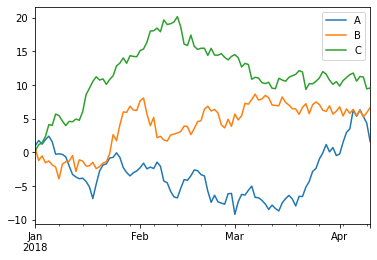

In [106]:
df1.plot()

array([[<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'C'}>, <AxesSubplot:>]], dtype=object)

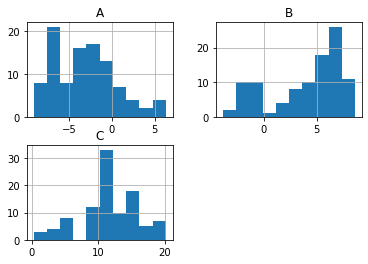

In [107]:
df1.hist()

<AxesSubplot:>

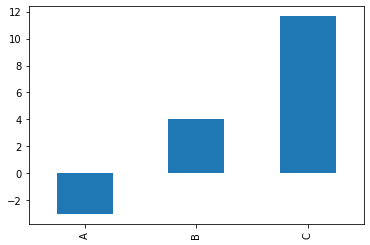

In [108]:
df1.mean().plot.bar()

- apply를 이용한 함수의 다중적용

In [109]:
df = pd.DataFrame(np.arange(10000000))
df

,0
0,0
1,1
2,2
3,3
4,4
...,...
9999995,9999995
9999996,9999996
9999997,9999997
9999998,9999998


In [110]:
def f(x):
    return x**2

df[0].map(f) # map 은 하나의 칼럼(하나의 series)에 대해서만 적용 가능합니다.

0                       0
1                       1
2                       4
3                       9
4                      16
                ...      
9999995    99999900000025
9999996    99999920000016
9999997    99999940000009
9999998    99999960000004
9999999    99999980000001
Name: 0, Length: 10000000, dtype: int64

In [111]:
df[0].apply(f) # apply도 마찬가지로 하나의 칼럼에 대해 적용할 수 있지만, 전체 데이터프레임에 적용할수도 있습니다.

0                       0
1                       1
2                       4
3                       9
4                      16
                ...      
9999995    99999900000025
9999996    99999920000016
9999997    99999940000009
9999998    99999960000004
9999999    99999980000001
Name: 0, Length: 10000000, dtype: int64

In [112]:
df.apply(f)

,0
0,0
1,1
2,4
3,9
4,16
...,...
9999995,176447257
9999996,196447248
9999997,216447241
9999998,236447236


In [113]:
df.map(f) # map은 전체 데이터프레임에 적용할 수 없어서 에러가 납니다.

AttributeError: 'DataFrame' object has no attribute 'map'

In [114]:
df.applymap(f) # map과 반대로 applymap은 전체 데이터프레임에만 적용가능하고, 하나의 칼럼에는 정의되지 않습니다.

,0
0,0
1,1
2,4
3,9
4,16
...,...
9999995,99999900000025
9999996,99999920000016
9999997,99999940000009
9999998,99999960000004


In [115]:
%timeit df.applymap(f)

6.95 s ± 357 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [116]:
%timeit df.apply(f) # apply는 전체 데이터프레임에 적용시 병렬처리되어 가장 빠르게 작동합니다. 따라서, 가능하다면 apply를 이용하여 연산하는 것이 좋습니다.

98.4 ms ± 4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [117]:
%timeit df[0].apply(f) # 하나의 series에 정의된 apply는 applymap과 동일합니다.

6.53 s ± 209 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [118]:
%timeit df[0].map(f)

6.59 s ± 68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
